In [96]:
import sys
sys.path.insert(
    0,
    r"C:\Users\DELL\Desktop\Math and Stats for DS (CSC)",
)

In [97]:
%reload_ext autoreload

In [98]:
%autoreload 2

In [99]:
from utils import * 
import OLS_linear_regression as olr

In [60]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats

In [21]:
# 1. Đọc dữ liệu, xem thông tin dữ liệu
data = pd.read_excel('canxi.xlsx')

In [22]:
# head
data.head()

,response_number,knowledge_score,calcium_intake
0,1,1.0,0.450
1,2,4.2,1.050
2,3,3.8,0.900
3,4,1.5,0.525
4,5,2.2,0.710


In [23]:
# info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
response_number    20 non-null int64
knowledge_score    20 non-null float64
calcium_intake     20 non-null float64
dtypes: float64(2), int64(1)
memory usage: 560.0 bytes


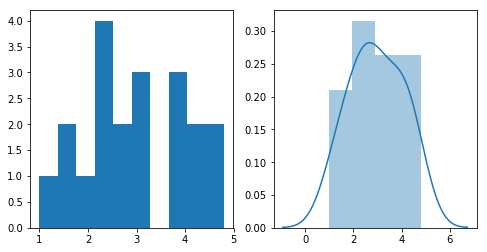

In [24]:
# 2. Biểu đồ phân phối tần suất
frequency_plot(np.asarray(data["knowledge_score"]))

* Phân phối của "knowledge_score" khá đều, các điểm dữ liệu tập trung trong khoảng từ 2 đến 5

In [31]:
# 3. Các thống kê cơ bản
# 4. Các giá trị ở phân vị thứ 20, 35, 65 90
canxi_common_stats = common_statistic_array(np.asarray(data["calcium_intake"]), percentiles=np.array([20, 35, 65, 90]))
print(canxi_common_stats["mean"])
print(canxi_common_stats["median"])
print(canxi_common_stats["mode"])
print(canxi_common_stats["max"])
print(canxi_common_stats["min"])
print(canxi_common_stats["range"])
print(canxi_common_stats["percentile"])

0.7850999999999999
0.799
ModeResult(mode=array([0.45]), count=array([1]))
1.085
0.45
0.635
[0.6846  0.74665 0.8514  0.9915 ]


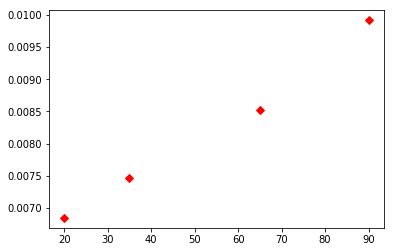

In [49]:
# Plot percentiles
plt.plot(np.array([20, 35, 65, 90]), canxi_common_stats["percentile"]/100, marker='D', color='red',
         linestyle='none')
plt.show()

In [36]:
knowledge_score_common_stats = common_statistic_array(np.asarray(data["knowledge_score"]), percentiles=np.array([25,75]))
print(knowledge_score_common_stats["mean"])
print(knowledge_score_common_stats["median"])
print(knowledge_score_common_stats["mode"])
print(knowledge_score_common_stats["max"])
print(knowledge_score_common_stats["min"])
print(knowledge_score_common_stats["range"])

2.96
2.9
ModeResult(mode=array([2.2]), count=array([2]))
4.8
1.0
3.8


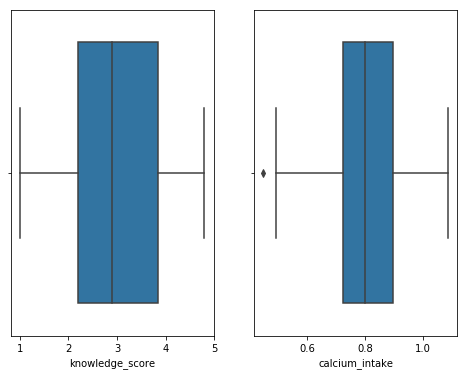

In [34]:
# 5. Box plot
box_plot(data, "knowledge_score", "calcium_intake")

* calcium_intake có 1 giá trị outlier là giá trị nhỏ nhất 0.45

In [43]:
# 6. Variance của knowledge_score
print(knowledge_score_common_stats["var"])

1.1643999999999999


In [44]:
# 7. Standard deviation của calcium_intake
print(canxi_common_stats["std"])

0.16997467458418622


In [46]:
# 8. Skewness của knowledge_score
print(canxi_common_stats["skew"])

-0.290048256873068


* Skew < 0 => Phân phối lệch trái

In [51]:
# 9. Kurtosis của knowledge_score
print(canxi_common_stats["kurtosis"])
print(canxi_common_stats["kurtosis_pearson"])

-0.500617348294564
2.499382651705436


* Với độ nhọn = 3 (theo Pearson) hoặc = 0 (theo Kurtosis) thì sẽ là phân phối chuẩn , ở đây độ nhọn < 3 (<0) => phân bố này tù hơn phân bố chuẩn

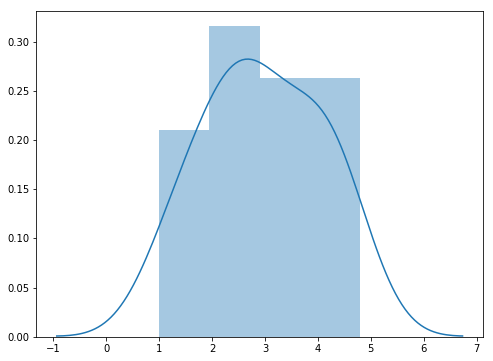

In [54]:
distribution_plot(np.asarray(data["knowledge_score"]), xlabel="Distribution", ylabel="knowledge_score")

In [86]:
# 10. Số lượng mẫu có giá trị calxium_intake lớn hơn 0.75. 
canxi_more_than_0_75 = data[data["calcium_intake"] > 0.75]["calcium_intake"].tolist()
print("Số lượng mẫu lớn hơn 0.75: " + str(len(canxi_more_than_0_75)))
print("Xác suất các mẫu có calxium_intake lớn hơn 0.75 ((P(X>0.75))): " + str(1 - stats.norm.cdf(0.75, loc=canxi_common_stats["mean"], scale=canxi_common_stats["std"])))

Số lượng mẫu lớn hơn 0.75: 13
Xác suất các mẫu có calxium_intake lớn hơn 0.75 ((P(X>0.75))): 0.5818003453743674


In [85]:
str(1 - stats.norm.cdf(0.75, loc=canxi_common_stats["mean"], scale=canxi_common_stats["std"]))

'0.5818003453743674'

In [87]:
# 11. Xác suất P(0.65 =< calcium_intake =< 0.85)
p_lower_than_0_65 = stats.norm.cdf(0.65, loc=canxi_common_stats["mean"], scale=canxi_common_stats["std"])
p_lower_than_0_85 = stats.norm.cdf(0.85, loc=canxi_common_stats["mean"], scale=canxi_common_stats["std"])
print("Xác suất P(0.65 =< calcium_intake =< 0.85): " + str(p_lower_than_0_85 - p_lower_than_0_65))

Xác suất P(0.65 =< calcium_intake =< 0.85): 0.435345287392095


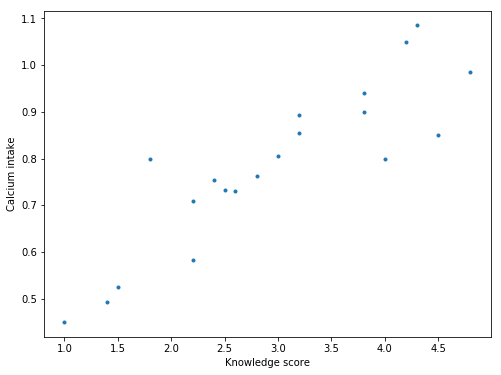

In [90]:
# 12. Vẽ biểu đồ tương quan
scatter_plot(data["knowledge_score"], data["calcium_intake"], xlabel="Knowledge score", ylabel="Calcium intake")

<Figure size 576x432 with 0 Axes>

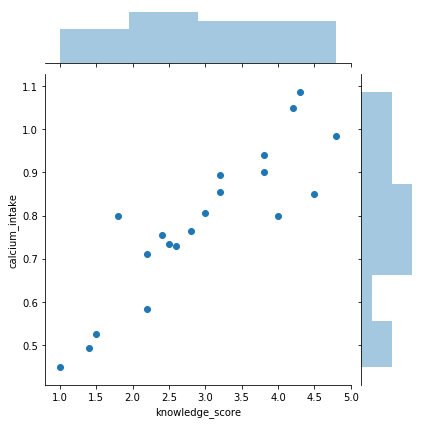

In [91]:
joint_plot(data, "knowledge_score", "calcium_intake")

* Dựa vào đồ thị, ta thấy 2 đại lượng có mối tương quan tuyến tính. Mặc dù vậy vẫn có những điểm gây nhiễu, chúng ta cần kiểm chứng qua correlation coefficient

In [95]:
coeff_knowledge_canxi = common_statistic_2_arrays(data["knowledge_score"], data["calcium_intake"])
print("Pearson correlation: " + str(coeff_knowledge_canxi[0]))
print("Spearman correlation: " + str(coeff_knowledge_canxi[1]))

Pearson correlation: 0.88225513799049
Spearman correlation: 0.8934894667856549


In [94]:
# 14. Nhận xét 

* Cả 2 độ tương quan Pearson và Spearman đều lớn hơn 0.7, lần lượt là 0.88 và 0.89, chứng tỏ mối tương quan của 2 đại lượng là tương quan thuận và tương quan lớn (correlation coefficient gần với 1). Như vậy, ta có thể dựa trên knowledge_score để dự đoán calcium_intake

In [100]:
# 15. Dự đoán

In [109]:
x = np.asarray(data["knowledge_score"])
x = x.reshape(x.size, 1)
y = np.asarray(data["calcium_intake"])
print(x.shape)
print(y.shape)

(20, 1)
(20,)


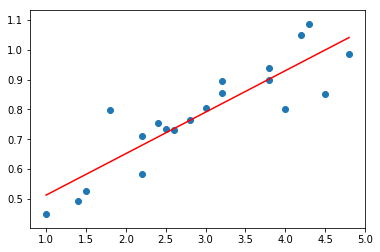

In [117]:
# 15b. Trực quan hóa dữ liệu
ols_lr_builder = olr.OLSLinearRegression()
reg = ols_lr_builder.fit(x,y)
y_pred = reg.predict(x)

plt.scatter(x,y)
plt.plot([min(x), max(x)], [min(y_pred), max(y_pred)], color='red')
plt.show()

In [116]:
# 15a. Giải phương trình
print("Giá trị của m: " + str(reg.slope[0]))
print("Giá trị của b: " + str(reg.intercept[0]))

Giá trị của m: 0.13897200274819646
Giá trị của b: 0.3737428718653384


In [135]:
# 15c. tìm calcium_intake dựa vào knowledge_score lần lượt là 2.0, 2.7, 3.5, 4.4
x_test = np.array([2.0, 2.7, 3.5, 4.4])
y_pred = reg.predict(x_test)
print("Giá trị của knowledge_score lần lượt là: " + str([2.0, 2.7, 3.5, 4.4]))
print("Giá trị calcium_intake với knowledge_score đã cho lần lượt là: " + str(list(reg.predict(x_test))))

Giá trị của knowledge_score lần lượt là: [2.0, 2.7, 3.5, 4.4]
Giá trị calcium_intake với knowledge_score đã cho lần lượt là: [0.6516868773617313, 0.7489672792854689, 0.860144881484026, 0.9852196839574029]
